### TEM Beta Lactamase Analysis 002 Network Image

In [28]:
%reload_ext autoreload
%autoreload 2
import os
import sys
import time
import py4cytoscape as p4c
from pyeed.core import ProteinInfo, Alignment
from pyeed.aligners import PairwiseAligner
from pyeed.network import SequenceNetwork
import networkx as nx
import matplotlib.pyplot as plt
from py4cytoscape import gen_node_color_map, gen_node_size_map, scheme_c_number_continuous

##### reading in the files and alignments

In [29]:
%reload_ext autoreload
%autoreload 2
n_hits = 200
e_value = 0.05
current_path = os.path.dirname(os.getcwd())
starting_protein_tem = ProteinInfo.get_id("QGC48744.1")


In [30]:
# read in the saved fetched results
name = starting_protein_tem.source_id.replace('.', '')
read_blast_folder = os.path.join(current_path, "TEM-lactamase", "data", "data_blast_search_{}_{}_{}".format(name, n_hits, int(e_value*1000)))
protein_list = []
for file in os.listdir(read_blast_folder):
    with open(os.path.join(read_blast_folder, file), "r") as f:
        protein_list.append(ProteinInfo.from_json(f))

In [31]:
# check for duplicates in the protein list
seen = set()
protein_list_clean = []
for protein in protein_list:
    if protein.source_id in seen:
        print("Duplicate found: {}".format(protein.source_id))
    else:
        protein_list_clean.append(protein)
    seen.add(protein.source_id)

print(len(protein_list_clean))
print(len(protein_list))


201
201


#### Actual Network Work

In [32]:
# check if the cytocope connection is working and is valid
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.2',
 'automationAPIVersion': '1.9.0',
 'py4cytoscapeVersion': '1.9.0'}

In [41]:
# create a network with the SequencNetwork class
network = SequenceNetwork(
    sequences=protein_list_clean,
    weight="identity",
    threshold=0.996,
    dimensions=2,
    color="taxonomy_id",
)

In [42]:
network.create_cytoscope_graph(collection="TEM-lactamase", title="TEM-lactamase-003")

You are connected to Cytoscape!


⛓️ Running pairwise alignments: 100%|██████████| 20100/20100 [00:01<00:00, 11094.43it/s]


Applying default style...
Applying preferred layout


In [43]:
df_nodes = p4c.get_table_columns(table='node')
df_edges = p4c.get_table_columns(table='edge')
print('DF nodes:', df_nodes.columns)
# print('DF edges:', df_edges.head())

DF nodes: Index(['SUID', 'shared name', 'id', 'degree_all', 'family_name', 'domain',
       'kingdom', 'phylum', 'tax_class', 'order', 'family', 'genus', 'species',
       'ec_number', 'mol_weight', 'taxonomy_id', 'betweenness', 'x_pos',
       'y_pos', 'z_pos', 'name', 'selected'],
      dtype='object')


In [44]:
# layout_name: str="force-directed", properties_dict: dict={"defaultSpringCoefficient": 4e-5, "defaultSpringLength": 100, "defaultNodeMass": 3, "numIterations": 50,}
layout_name = 'force-directed'
properties_dict = {"defaultSpringCoefficient": 4e-5, "defaultSpringLength": 100, "defaultNodeMass": 3, "numIterations": 50,}

p4c.layout_network(layout_name)
# ['numIterations', 'defaultSpringCoefficient', 'defaultSpringLength', 'defaultNodeMass', 'isDeterministic', 'singlePartition']
p4c.set_layout_properties(layout_name=layout_name, properties_dict=properties_dict)

p4c.scale_layout(axis='Both Axis', scale_factor=1.0)
''

{}

In [ ]:
p4c.layout_network('circular')

In [45]:
############## COLOR NODES ################
style_name = 'niklas_node_color_style'
color_by = 'species'
data_color_names = list(set(df_nodes[color_by]))

# matplotlib has several colormaps. Here we use 'tab20', which is good for categorical data
colors = plt.cm.tab20(range(len(data_color_names)))
hex_colors = ['#%02x%02x%02x' % (int(r*255), int(g*255), int(b*255)) for r, g, b, _ in colors]

# Convert RGB to hex colors for py4cytoscape
hex_colors = ['#' + ''.join([f'{int(c*255):02x}' for c in color[:3]]) for color in colors]

if not (style_name in p4c.get_visual_style_names()):
    p4c.create_visual_style(style_name)

p4c.set_node_color_default('#FFFFFF', style_name)
p4c.set_node_color_mapping(color_by, mapping_type='discrete', default_color='#654321', style_name=style_name, table_column_values=data_color_names, colors=hex_colors)

''

In [46]:
############## NODES ################
p4c.set_node_shape_default('ELLIPSE', style_name)
p4c.set_node_size_mapping(**gen_node_size_map('degree_all', scheme_c_number_continuous(15, 40), mapping_type='c', style_name=style_name))
p4c.set_node_label_mapping('name', style_name=style_name)
p4c.set_node_font_size_mapping(**gen_node_size_map('degree_all', scheme_c_number_continuous(0, 4), style_name=style_name))

''

In [47]:
p4c.set_visual_style(style_name)

{'message': 'Visual Style applied.'}

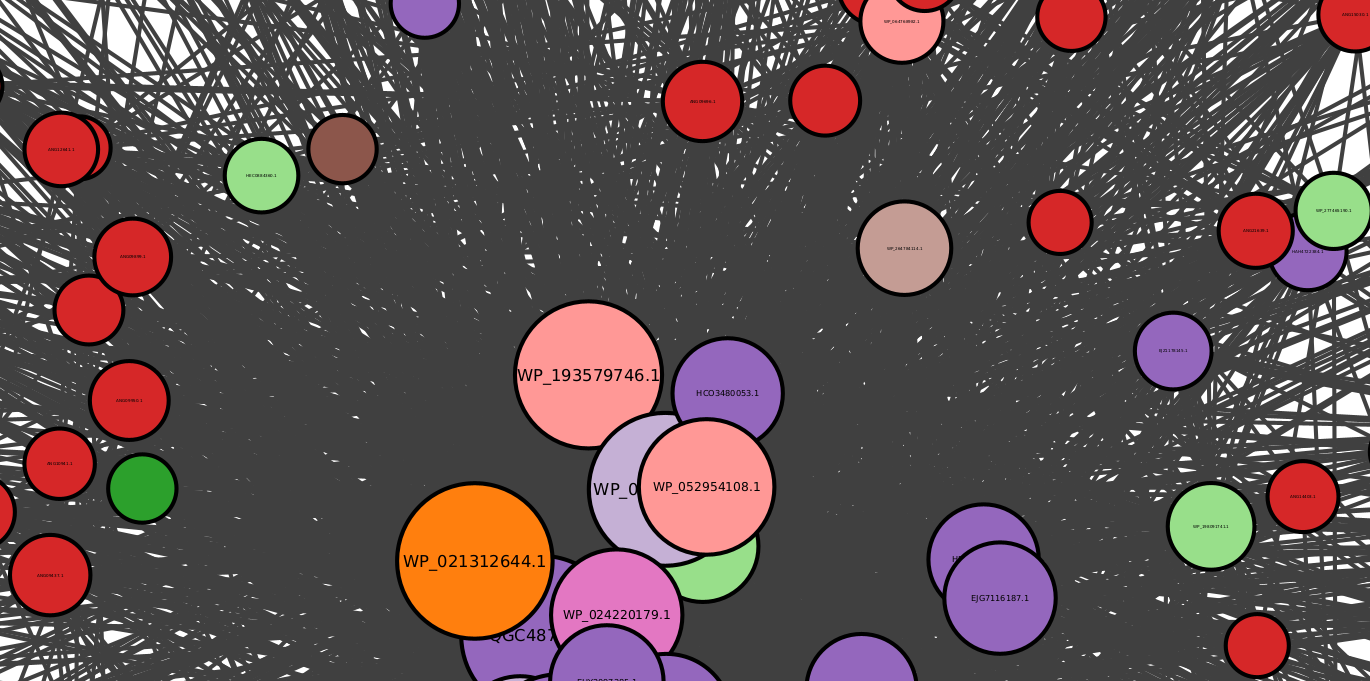

In [48]:
time.sleep(1)
p4c.notebook_export_show_image(filename="test_image_002", type="png", resolution=600, zoom=100.0, overwrite_file=True)

# What will be added in the next steps


- we will have diffrent styles --> pretty basic but a few as examples
- documentation will follow in the next days
- the Docker Image will be updated
- the threshhold can and will be adjustable
- the entrie Network will be able to be saved (once calculated) 